## Calcular el Factorial de un número

In [1]:
myFactorialRecursive<-function(x){    
    x<-as.integer(x)
    if (x<=1){
        return(1)
    }else{
        return (x*myFactorialRecursive(x-1))
    }
}

myFactorialIter<-function(x){
    f <- 1
    x<-as.integer(x)
    if (x<=1){
        return(1)
    }else{
        for (i in 1:x){
               f<-i*f
        }        
    }
    f
}

In [2]:
v<-5
myFactorialRecursive(v)
myFactorialIter(v)
factorial(v)

[1] 120

[1] 120

[1] 120

## Percentiles

Hacer una función que calcule el percentil de un vector. Recibirá dos parámetros, el vector y el percentil que queremos ver, sino se indica el percentil se supondrá que es el 50%.

In [3]:
calcPercentile<-function(x,p=50){
    p<-p/100
    x<-sort(na.omit(x))
    idx<- 1+(length(x)-1)*p
    err<-ceiling(idx)-idx
        
    xl<-x[floor(idx)]
    xh<-x[ceiling(idx)]   

    xl*err+xh*(1-err)
}

In [4]:
x<-runif(100,min=0,max=10)
calcPercentile(x)
quantile(x,0.5)

calcPercentile(x,92)
quantile(x,0.92)

[1] 4.488823

50% 
4.488823

[1] 8.994322

92% 
8.994322

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

In [5]:
poblacion<-read.csv("funcProbabilidad/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F)
poblacion$V5<-NULL
colnames(poblacion)<-c("edadTxt","Total","Hombres","Mujeres")
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104

In [6]:
max(poblacion$Total)

[1] 804223

In [7]:
paste("La edad con más población, la moda, es:",
      poblacion$edadTxt[which.max(poblacion$Total)])

[1] "La edad con más población, la moda, es:     41 años"

\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [8]:
paste("La edad media es:",
      sum(poblacion$edad*poblacion$Total)/sum(poblacion$Total))

[1] "La edad media es: 42.586387378654"

In [9]:
paste("La edad mediana es", 
      poblacion$edad[which.min(abs(cumsum(poblacion$Total/sum(poblacion$Total))-0.5))])

[1] "La edad mediana es 42"

## Peso al nacer

Leer el dataset que se encuentra en tests/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
Calcular cuantiles, media, desigualdad Chebyshev para k=2, y compararla con cuantiles. Boxplot.
¿Sigue una distribución gaussiana?

In [10]:
bwt<-read.csv("tests/birthweight_reduced.csv")
weight<-bwt$Birthweight

In [11]:
quantile(weight,c(0.125,0.25,0.5,0.75,0.875))

12.5%   25%   50%   75% 87.5% 
5.825 6.450 7.250 8.000 8.600

In [12]:
k<- sqrt(2)
limit_inf  <- mean(weight)-k*sd(weight)
limit_sup <- mean(weight)+k*sd(weight)

paste0("Como máximo el ",1/k^2," de las muestras estarán fuera del intervalo [",limit_inf,",",limit_sup,"]")

k<- 2
limit_inf  <- mean(weight)-k*sd(weight)
limit_sup <- mean(weight)+k*sd(weight)

paste0("Como máximo el ",1/k^2," de las muestras estarán fuera del intervalo [",limit_inf,",",limit_sup,"]")

[1] "Como máximo el 0.5 de las muestras estarán fuera del intervalo [5.38375091008086,9.14482051849057]"

[1] "Como máximo el 0.25 de las muestras estarán fuera del intervalo [4.60480788966458,9.92376353890685]"

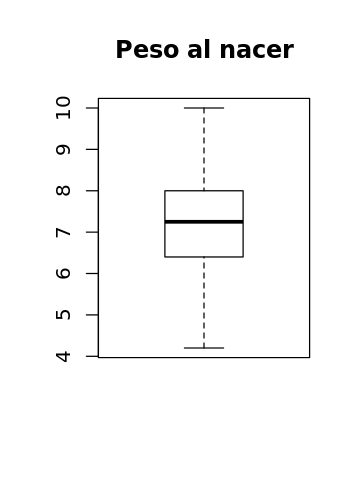

In [13]:
options(repr.plot.height=4,repr.plot.width=3)
boxplot(weight,main="Peso al nacer")
options(repr.plot.height=7,repr.plot.width=7)

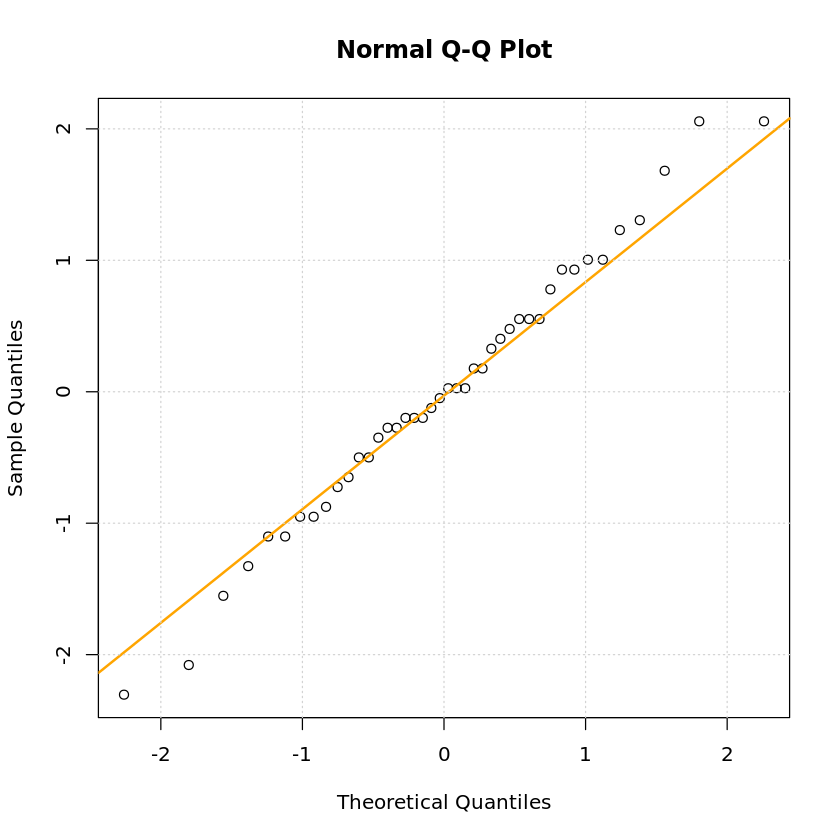

In [14]:
qqnorm((weight-mean(weight))/sd(weight))
qqline((weight-mean(weight))/sd(weight), col = 'orange', lwd =2)
grid()

### La paradoja del Autobús

Un autobus tiene una frecuencia de 1 autobús cada 10 minutos. 
¿Cuanto tiempo de media tengo que esperar para ver pasar un autobús por la parada? 
¿Y para ver 2 autobuses pasar por la parada?  
¿Cual es la probabilidad de que el autobús llegue antes de que pase 5 minutos esperando?

### Hipótesis 1: 

El autobús tiene un horario fijo y preciso. Cada autobús sale cada 10 minutos exactamente. Podemos asumir que no hay atasco y los autobuses cumplen el horario previsto.

Llegamos a la parada en un tiempo aleatorio. El autobús puede llegar en cualquier momento que siga una distribución en 0 y 10 minutos.

La media de espera de un autobús es: $\mu=\frac{b-a}{2}-\frac{10-0}{2}=5$ minutos

La media de espera para ver dos autobuses es: 5+10=15 minutos

La probabilidad de que el autobús llegue antes de que pase 5 minutos esperando es:
\\[
P(X<5)=\int_0^5 \frac{1}{10} dx = 0.5
\\]


[1] "función de densisdad de probabilidad de que aparezca un autobús"

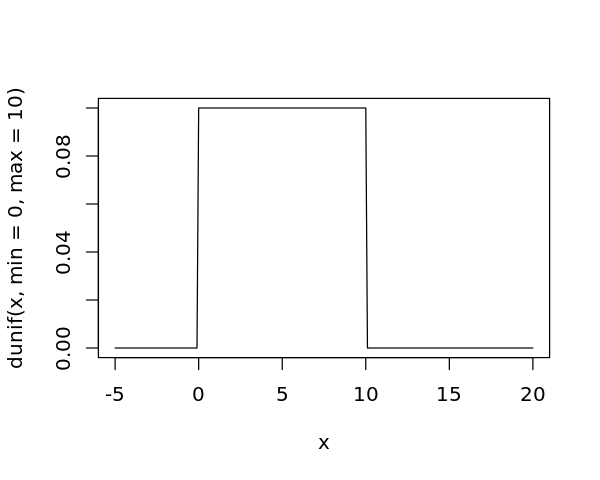

In [15]:
options(repr.plot.height=4,repr.plot.width=5)
x<-seq(-5,20,by=0.1)
plot(x,dunif( x,min=0,max=10 ),t='l')
paste("función de densisdad de probabilidad de que aparezca un autobús")
options(repr.plot.height=3,repr.plot.width=5,xlab="minutos")

### Hipótesis 2: 

El autobús tiene un horario fijo y preciso. Cada autobús sale cada 10 minutos exactamente. Pero el tráfico no es fluido, hay mucha gente subiendo y bajando del autobús continuamente y nos encontramos en una parada lejana de la cabecera.

Llegamos a la parada en un tiempo aleatorio. Podemos asumir que el hecho de que aparezca un autobús en la parada es independiente de cuando fue la última vez que pasó un autobús. Los autobuses aparecen en la parada siguiendo una distribución de Poisson y el tiempo de espera se modela con una distribución exponencial. Se producirá un evento (aparecerá un bus) con una media de $\lambda=1/10$ cada minuto.

La media de espera para ver un autobús sería $1/\lambda=10$ minutos

La media de espera para ver dos autobuses sería 20 minutos


La probabilidad de que el autobús llegue antes de que pase 5 minutos esperando es:
\\[
P(X<5)=\int_0^5 \frac{1}{10}·e^{\frac{-1}{10}} dx =-e^{-\frac{1}{10}} \Big|_0^5 = -e^{\frac{-5}{10}}+e^0=0.3934
\\]
